In [1]:
%run tools.py
import scipy.stats

### Fst analyses - GAARDIAN

@TODO 


I need to do resampling of the data and alllow 

In [2]:
wgs = pd.read_csv("../resources/metadata/wgs_snp_data.csv")
wgs = pd.merge(wgs, metadata[['sample_id', 'partner_sample_id']])

NameError: name 'metadata' is not defined

In [ ]:
wgs.to_csv("../resources/metadata/wgs_snp_data.csv", index=None)

In [ ]:
df_sample_sets = pd.read_csv("../resources/manifest.tsv", sep="\t")
df_sample_sets

#### Load data

In [4]:
sample_set = "1244-VO-GH-YAWSON-VMF00149"
chroms = ['2L', '2R', '3L', '3R', 'X']

In [5]:
snps = {}
pos = {}

for chrom in chroms:
    
    snps[chrom], pos[chrom], metadata = load_arrays_and_metadata("../resources", sample_set, chrom)
    
metadata['location2'] = metadata['location'].str.split(".").str.get(0)

In [ ]:
bial_ = snps['2L'].count_alleles().is_biallelic_01()
bial_.sum().compute()

In [5]:
metadata.head(2)

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,species_gambiae_coluzzii,location2
0,VBS45187-5563STDY8782450,WA-2001,Alexander Egyir-Yawson,Ghana,Adumanu.House.A,2018,3,6.304,-1.681,F,gambiae,Adumanu
1,VBS45188-5563STDY8782451,WA-2002,Alexander Egyir-Yawson,Ghana,Adumanu.House.C,2018,10,6.302,-1.682,F,coluzzii,Adumanu


In [6]:
metadata.location2.value_counts()

Domenase         57
Annorkrom        49
New Edubiase     42
Pokukrom         37
Odumto           34
Koniyaw          32
Nkotumso         30
Kokotro          28
Prisintease      24
Kente            24
Watreso          19
Adansi Apagya    16
Wamase           16
Ankaako          12
Mprakyire        10
Anwona            8
Yadome            6
Adansi-Krom       6
Adumanu           6
Asonkore          5
Jacobu            5
Bogyawe           5
Fumso             4
Dompoase          3
Anhwiaso          2
Bogobiri West     2
Subin Camp        2
Mensonso          1
Name: location2, dtype: int64

#### Calculate Fst, location v location - coluzzii

In [7]:
chrom = '3L'
metadata.species_gambiae_coluzzii.value_counts()

coluzzii    422
gambiae      63
Name: species_gambiae_coluzzii, dtype: int64

In [8]:
coluzzii_bool = metadata.species_gambiae_coluzzii == 'coluzzii'
geno = snps[chrom].compress(coluzzii_bool, axis=1)
meta = metadata[coluzzii_bool]

In [9]:
pos

{'2L': array([    1215,     1216,     1231, ..., 49356403, 49356404, 49359100],
       dtype=int32),
 '2R': array([      53,       55,       56, ..., 61542777, 61542778, 61542779],
       dtype=int32),
 '3L': array([     542,      544,      545, ..., 41962906, 41962907, 41962920],
       dtype=int32),
 '3R': array([     180,      185,      236, ..., 53196502, 53196504, 53196522],
       dtype=int32),
 'X': array([       2,        3,        4, ..., 24392611, 24392613, 24392617],
       dtype=int32)}

In [10]:
seg = geno.count_alleles().is_segregating()
geno = geno.compress(seg, axis=0)

In [11]:
pos1 = pos[chrom][seg]

In [12]:
geno.shape

(6445299, 422, 2)

In [13]:
pos1.shape

(6445299,)

An.coluzzii Fst location v location

In [15]:
loc_ac = {}

for loc in meta.location2.unique():

    loc_bool = meta.location2 == loc
    if loc_bool.sum() < 11:
        continue
    
    print(loc)
    nmeta = meta[loc_bool]

    loc_ac[loc] = geno.compress(loc_bool, axis=1).count_alleles()    

Adumanu
Kente
Odumto
Watreso
Adansi-Krom
Ankaako
Koniyaw
Kokotro
Anhwiaso
Anwona
Fumso
New Edubiase
Adansi Apagya
Wamase
Yadome
Annorkrom
Prisintease
Pokukrom
Nkotumso
Domenase
Bogyawe
Subin Camp
Mprakyire
Jacobu
Dompoase


In [17]:
loc_ac.keys()

dict_keys(['Kente', 'Odumto', 'Watreso', 'Ankaako', 'Koniyaw', 'Kokotro', 'New Edubiase', 'Adansi Apagya', 'Wamase', 'Annorkrom', 'Prisintease', 'Pokukrom', 'Nkotumso', 'Domenase'])

In [16]:
meta_locs = meta.groupby('location2').agg({'latitude':'mean', 'longitude':'mean'})

In [18]:
x_list = []
y_list = []

fst_list = []
km_list = []


for x,y in itertools.combinations(loc_ac.keys(), 2):

    x_list.append(x)
    y_list.append(y)

    fst, se, _, _ = allel.average_hudson_fst(loc_ac[x], loc_ac[y], blen=1000000)        
    fst_list.append(fst)
   
    a = meta_locs[meta_locs.index == x].to_numpy()[0]
    b= meta_locs[meta_locs.index == y].to_numpy()[0]
    
    km = geopy.distance.geodesic(a, b).km
    km_list.append(km)
    
    print(x, y, km, fst)

km_fst_df = pd.DataFrame({'loc1':x_list, 'loc2': y_list, 'km':km_list, 'fst':fst_list})
km_fst_df.to_csv("km_fst_df_MoreThan12Samples.csv")

Kente Odumto 6.661472425983306 0.0007039974238500764
Kente Watreso 13.78808341940896 7.066473705650134e-05
Kente Ankaako 13.707964334356387 0.0006084680896198571


KeyboardInterrupt: 

In [122]:
km_fst_df = pd.DataFrame({'loc1':x_list, 'loc2': y_list, 'km':km_list, 'fst':fst_list})

In [123]:
km_fst_df['fst/(1-fst)'] = km_fst_df['fst']/(1-km_fst_df['fst'])

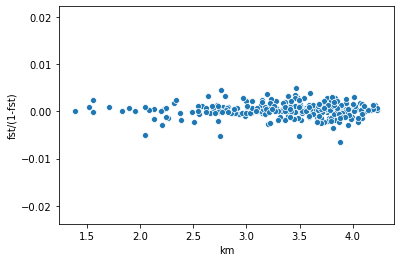

In [124]:
sns.scatterplot(np.log(km_fst_df['km']), km_fst_df['fst/(1-fst)'])

In [121]:
scipy.stats.linregress(km_fst_df['fst/(1-fst)'], np.log(km_fst_df['km']))

LinregressResult(slope=18.770519785283497, intercept=3.370917056692362, rvalue=0.030220573289196823, pvalue=0.6021093164548073, stderr=35.963923137976394)

#### An. coluzzii Fst individual sample v sample

In [47]:
ind_ac = {}

with ProgressBar():
    for ind in meta.partner_sample_id.unique():

        ind_bool = meta.partner_sample_id == ind
        nmeta = meta[ind_bool]

        ind_ac[ind] = geno.compress(ind_bool, axis=1).count_alleles()    

[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.2s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  7.3s
[########################################] | 100% Completed |  6.9s
[########################################] | 100

[########################################] | 100% Completed |  7.8s
[########################################] | 100% Completed |  6.6s
[########################################] | 100% Completed |  6.6s
[########################################] | 100% Completed |  6.9s
[########################################] | 100% Completed |  7.0s
[########################################] | 100% Completed |  6.6s
[########################################] | 100% Completed |  7.7s
[########################################] | 100% Completed |  8.5s
[########################################] | 100% Completed |  7.1s
[########################################] | 100% Completed |  6.6s
[########################################] | 100% Completed |  7.2s
[########################################] | 100% Completed |  7.5s
[########################################] | 100% Completed |  6.9s
[########################################] | 100% Completed |  6.6s
[########################################] | 100

In [73]:
x_list = []
y_list = []

fst_list = []
km_list = []


for x,y in itertools.combinations(ind_ac.keys(), 2):

    x_list.append(x)
    y_list.append(y)

    fst, se, _, _ = allel.average_hudson_fst(ind_ac[x], ind_ac[y], blen=1000000)        
    print(fst)
    fst_list.append(fst)
   
    a = meta.loc[meta['partner_sample_id'] == x, ['latitude', 'longitude']].to_numpy()
    b= meta.loc[meta['partner_sample_id'] == y, ['latitude', 'longitude']].to_numpy()
    
    km_list.append(geopy.distance.geodesic(a, b).km)

-0.006349004498670117
-0.0007205842143638352
-0.0015167586824070289
0.005778101893882214
0.011639789600974216
0.004452230076859325
-0.004509477789567262
0.01017391452661023
0.003671299462942152
0.003162315842967495
-0.009486749875703747
-0.006792746618224284
0.008297942127391303
0.00729502599571358
0.014136526000251297
-0.0015649138868226813
-0.0017541928354018132
0.002194004960110301
0.005605485102674515
0.011194098925588649
0.0062346755105800985
0.012431138661573861
0.003875340141863351
0.00615436694079462
-0.0005326589638538623


KeyboardInterrupt: 

In [68]:
geopy.distance.geodesic(a, b).km

22.355597873437596

In [63]:
a = meta.loc[meta['partner_sample_id'] == 'WA-2002', ['latitude', 'longitude']].to_numpy() ; print(a)
b= meta.loc[meta['partner_sample_id'] == 'WA-2022', ['latitude', 'longitude']].to_numpy(); print(b)

[[ 6.302 -1.682]]
[[ 6.17  -1.835]]


Load FSt


In [21]:
meta = metadata[metadata['species_gambiae_coluzzii'] == 'coluzzii']

In [49]:
ls

G12_GAARDIAN_all_samples.ipynb  GAARDIAN_VGSC.ipynb       PCA_GAARDIAN.ipynb
GAARDIAN_Fst.ipynb              Karyotype_gaardian.ipynb  test.vcf
GAARDIAN_PCA.ipynb              old/                      tools.py


In [62]:
meta.location2.value_counts()

Domenase         57
Annorkrom        46
Pokukrom         37
Odumto           32
Koniyaw          31
Nkotumso         30
Prisintease      24
Kokotro          24
Kente            23
Watreso          19
Wamase           16
New Edubiase     15
Adansi Apagya    15
Ankaako          12
Mprakyire         9
Adansi-Krom       6
Yadome            6
Anwona            5
Adumanu           5
Bogyawe           3
Anhwiaso          2
Jacobu            2
Fumso             1
Subin Camp        1
Dompoase          1
Name: location2, dtype: int64

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


20
LinregressResult(slope=921.3343100833036, intercept=3.058467947138011, rvalue=0.39271220748613983, pvalue=0.017827485710466193, stderr=370.0252417770215)


15
LinregressResult(slope=534.1644250426162, intercept=3.2386370111363085, rvalue=0.3948687968422316, pvalue=0.0003467205783921281, stderr=142.562992116246)


10
LinregressResult(slope=357.8988169208771, intercept=3.2434052861140277, rvalue=0.2845224036916518, pvalue=0.006268642705383415, stderr=127.82554460248794)


8
LinregressResult(slope=341.34599214549087, intercept=3.260717597078173, rvalue=0.27136898933926323, pvalue=0.005107638282235442, stderr=119.29043190300706)


6
LinregressResult(slope=289.03415751299343, intercept=3.212121429045517, rvalue=0.25203913627286983, pvalue=0.0030757297006003648, stderr=95.86877486663447)


4
LinregressResult(slope=223.54761969859803, intercept=3.2713928041391758, rvalue=0.2113711242092137, pvalue=0.005516954937776819, stderr=79.5162675412919)


2
LinregressResult(slope=39.63982443376895, 

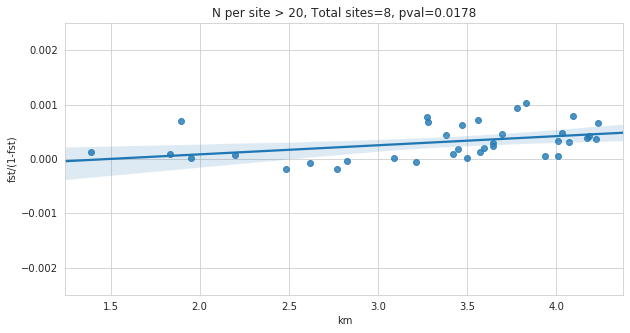

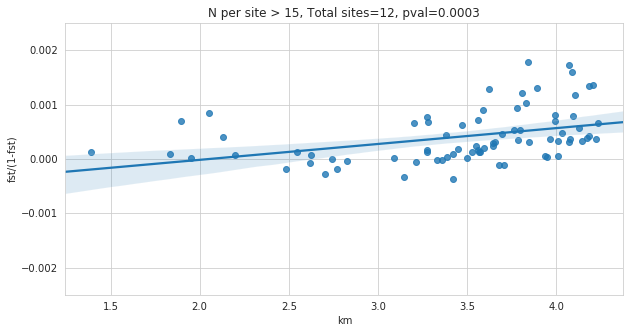

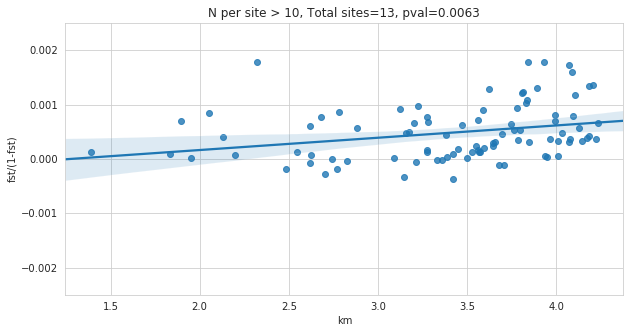

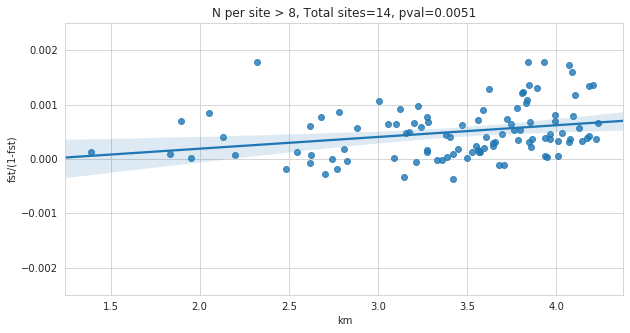

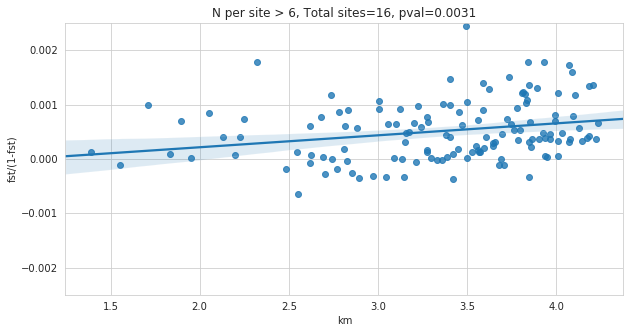

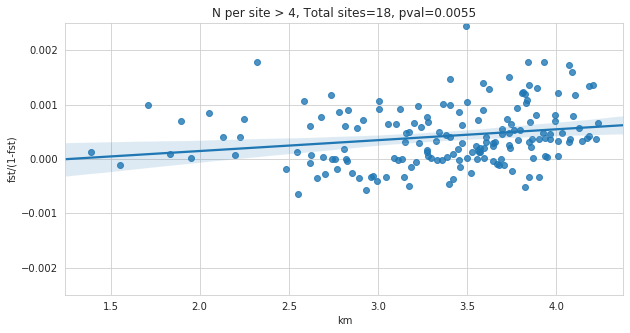

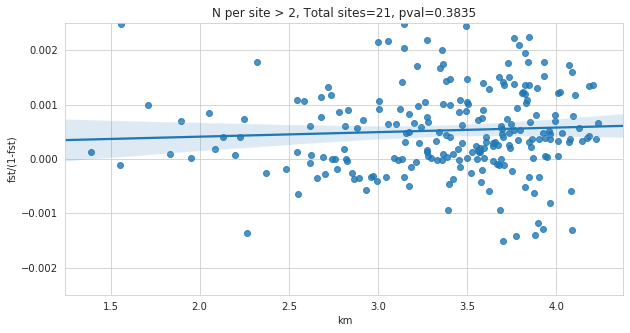

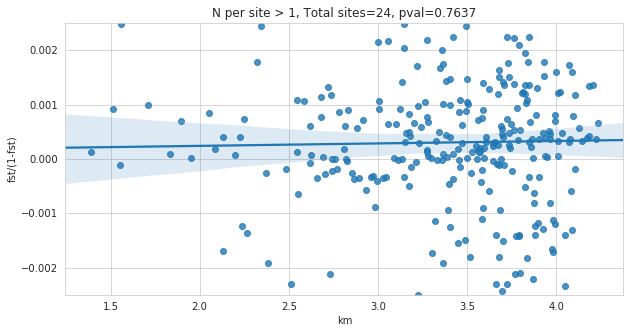

In [63]:
sns.set_style("whitegrid")
fst_km = pd.read_csv("../Fst_fm_coluzzii.tsv", sep="\t", index_col=0)

for limit in [20,15,10,8,6,4,2,1]:
    remove_locs = np.array(meta.location2.value_counts()[meta.location2.value_counts() < limit].index)
    fst_km2 = fst_km[~fst_km['loc1'].isin(remove_locs)]
    fst_km3 = fst_km2[~fst_km2['loc2'].isin(remove_locs)]
    
    fst_km3['fst/(1-fst)'] = fst_km3['fst']/(1-fst_km3['fst'])
    res = scipy.stats.linregress(fst_km3['fst/(1-fst)'], np.log(fst_km3['km']))
    print(limit)
    print(res)
    print("\n")
    
    plt.figure(figsize=[10,5])
    plt.ylim(-0.0025, 0.0025)
    plt.title(f"N per site > {limit}, Total sites={len(fst_km3.loc1.unique())}, pval={np.round(res.pvalue, 4)}")
    sns.regplot(np.log(fst_km3['km']), fst_km3['fst/(1-fst)'])

In [ ]:
res.